# **Spotify project**
<font size="3">

Introducción al Datascience - Universidad Católica del Norte - 2023

**Estudiantes:**
- **Carlo Ramírez, RUT: 20.504.139-7**
- **Joaquín Pinto, RUT: 20.881.033-2**
- **Marcelo Céspedes, RUT: 20.723.668-3**

Este proyecto tiene como finalidad hacer un **análisis exploratorio** de los datos recopilados sobre las canciones más escuchadas en Spotify 2023 **'spotify-2023.csv'**, además de generar dos modelos, uno que pueda determinar si una canción será exitosa, y un modelo recomendador de canciones similares en base a las características intrínsecas de cada una.
Este conjunto de datos incluye un listado completo de las canciones más famosas del 2023 en Spotify, ofreciendo una amplia gama de características que van más allá de lo habitual en conjuntos similares.

El resumen de los datos que contiene es el siguiente:

</font>

<font size="2">

- **track_name**: Nombre de la canción
- **artist(s)_name**: Nombre del(los) artista(s) de la canción
- **artist_count**: Número de artistas que contribuyen a la canción
- **released_year**: Año de lanzamiento de la canción
- **released_month**: Mes de lanzamiento de la canción
- **released_day**: Día del mes en que se lanzó la canción
- **in_spotify_playlists**: Número de listas de reproducción de Spotify en las que se incluye la canción
- **in_spotify_charts**: Presencia y posición de la canción en las listas de Spotify
- **streams**: Número total de reproducciones en Spotify
- **in_apple_playlists**: Número de listas de reproducción de Apple Music en las que se incluye la canción
- **in_apple_charts**: Presencia y posición de la canción en las listas de Apple Music
- **in_deezer_playlists**: Número de listas de reproducción de Deezer en las que se incluye la canción
- **in_deezer_charts**: Presencia y posición de la canción en las listas de Deezer
- **in_shazam_charts**: Presencia y posición de la canción en las listas de Shazam
- **bpm**: Latidos por minuto, una medida del tempo de la canción
- **key**: Tonalidad de la canción
- **mode**: Modo de la canción (mayor o menor)
- **danceability%**: Porcentaje que indica la idoneidad de la canción para bailar
- **valence_%**: Positividad del contenido musical de la canción
- **energy_%**: Nivel percibido de energía de la canción
- **acousticness_%**: Cantidad de sonido acústico en la canción
- **instrumentalness_%**: Cantidad de contenido instrumental en la canción
- **liveness_%**: Presencia de elementos de actuación en vivo
- **speechiness_%**: Cantidad de palabras habladas en la canción

</font>

## #0 Librerías
<font size="2">

Se importan las librerías a utilizar en el análisis.
</font>

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## #1 Carga de datos

Se cargan los datos de **'spotify-2023.csv'** en un dataframe usando pandas.

In [131]:
# Cargar los datos
file_path = './spotify-2023.csv'
spotify_data = pd.read_csv(file_path, encoding='ISO-8859-1')

## #2 Resumen inicial de los datos

Se describen los datos cargados para tener una visualización inicial y poder trabajarlos.

In [132]:
# Configuración para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Función para imprimir el resumen del DataFrame
def print_dataframe_summary(df):
    print("Resumen del DataFrame:")
    print("Dimensiones del conjunto de datos:", df.shape)
    print("Número de filas:", df.shape[0])
    print("Número de columnas:", df.shape[1])
    print("\nPrimeras 5 filas:\n", df.head().to_string())
    print("\nTipos de datos:\n", df.dtypes.to_string())
    print("\nValores nulos:\n", df.isnull().sum().to_string())

# Imprimir resumen del DataFrame
print_dataframe_summary(spotify_data)

Resumen del DataFrame:
Dimensiones del conjunto de datos: (953, 24)
Número de filas: 953
Número de columnas: 24

Primeras 5 filas:
                             track_name    artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  in_apple_charts in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm key   mode  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2           2023               7            14                   553                147  141381703                  43              263                  45                10              826  125   B  Major              80         89        83              31                   0           8              4
1                                 LALA       Myke Towers             1           2023               3            23 

## #3 Limpieza y preparación de los datos inicial

Se preparan los datos **previamente visualizados** limpiando las filas de valor nulo que no nos aportan información.
Se definen y setean los tipos de dato de cada columna del dataframe para poder manejarlos.

In [133]:
# Definimos las columnas que son números
number_cols = ['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'streams',
               'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts',  
               'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Limpiamos valores faltantes previamente visualizados
spotify_data = spotify_data.dropna(subset=['key'])

# Luego convertimos cada columna en number_cols a entero y rellenamos con 0 en caso de ser necesario
for col in number_cols:
    spotify_data[col] = pd.to_numeric(spotify_data[col], downcast='integer', errors='coerce')
    spotify_data[col] = spotify_data[col].fillna(0)
    spotify_data[col] = spotify_data[col].astype('int64')

# Verificamos nuevamente los valores faltantes después de la conversión
print("Valores faltantes por columna después de la conversión:")
print(spotify_data.isnull().sum())

# Verificamos los tipos de datos para confirmar la conversión
print("\nTipos de datos después de la conversión:")
print(spotify_data.dtypes)

# Imprimimos la cantidad de datos totales con los que trabajaremos
print("\nDatos totales para trabajar:", spotify_data.shape[0])

Valores faltantes por columna después de la conversión:
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Tipos de datos después de la conversión:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams          

## #4.1 Visualización inicial de datos

Se prepara una visualización inicial para los datos, graficando la **distribución** de los valores de las columnas.

In [134]:
# Función para crear gráficos de distribución
def plot_distribution(df, column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Función para crear gráfico de barras
def plot_bar_chart(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(title)
    plt.xticks(rotation=45, fontsize=8)
    plt.xticks(rotation=45)
    plt.show()

# Función para crear gráfico de dispersión
def plot_scatter(df, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

Se definen funciones para graficar estos datos, y se procede a graficar.

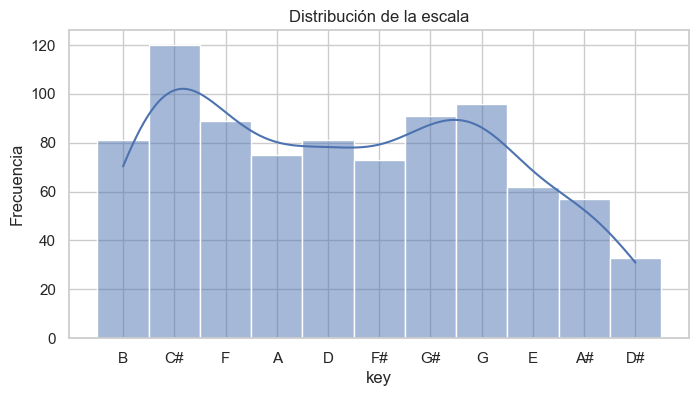

In [135]:
# Visualización de Distribuciones de escalas de las canciones
plot_distribution(spotify_data, 'key', f'Distribución de la escala')

Se puede observar que la mayor cantidad de canciones del dataset se encuentra en la **escala de C#**, siendo la verdad bastante variado el dataset, donde la menor cantidad de datos de una escala encontrada es **D#**.

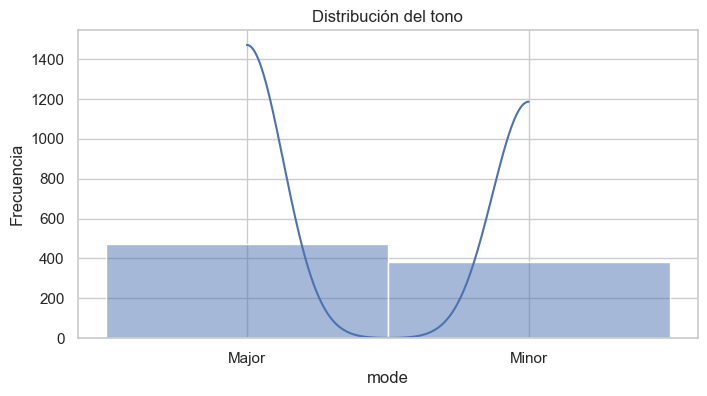

In [136]:
plot_distribution(spotify_data, 'mode', f'Distribución del tono')

Se puede observar que la mayor cantidad de canciones del dataset están en **tonalidad mayor**, por una diferencia no muy grande de datos.

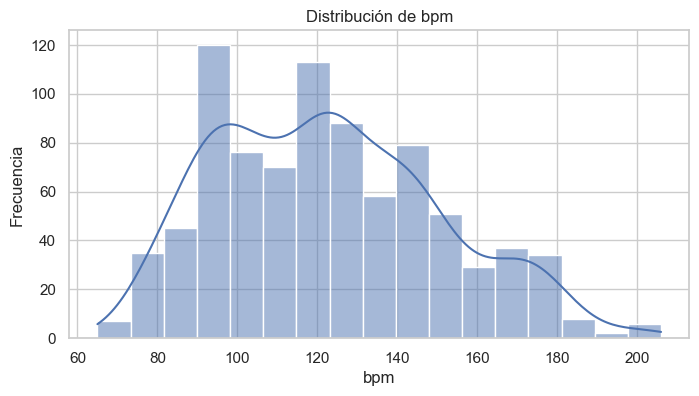

In [137]:
plot_distribution(spotify_data, 'bpm', f'Distribución de bpm')

Se puede observar que la mayor cantidad de los **bpm** de las canciones del dataset, oscila entre los **90-130** bpm, pero resulta ser variado teniendo en cuenta la cantidad de datos.

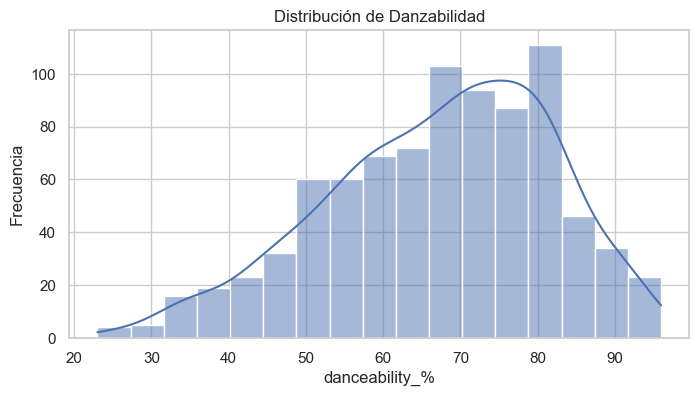

In [138]:
plot_distribution(spotify_data, 'danceability_%', f'Distribución de Danzabilidad')

Se puede observar que la mayor cantidad de **danzabilidad** de las canciones del dataset, oscila entre los **60-85 %**, y que todos los datos están por sobre un **25%** aproximadamente.

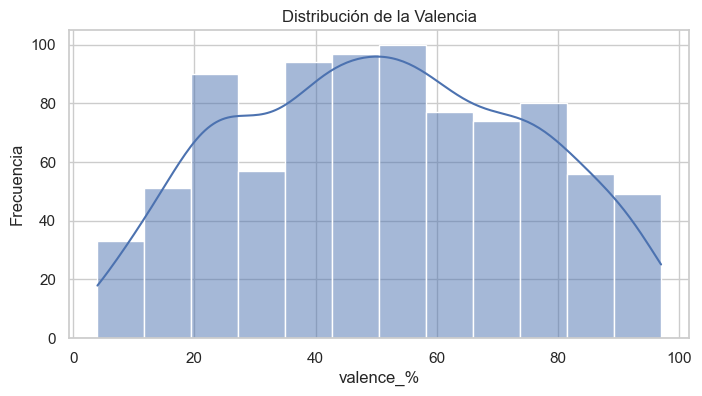

In [139]:
plot_distribution(spotify_data, 'valence_%', f'Distribución de la Valencia')

Se puede observar que la predominancia del valor de la **valencia** en el dataset, oscila entre **20-55%**, de todas maneras es variado.

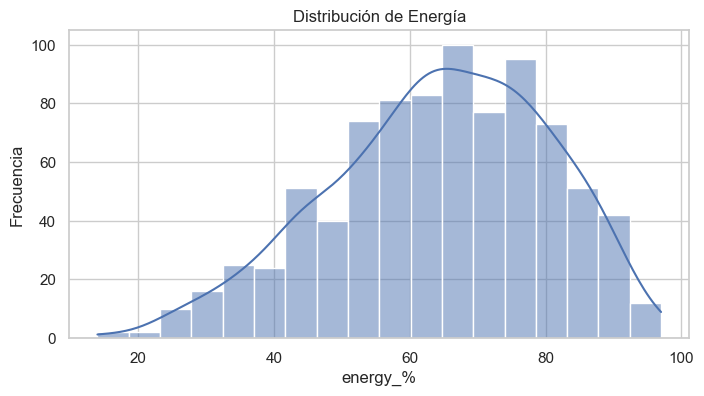

In [140]:
plot_distribution(spotify_data, 'energy_%', f'Distribución de Energía')

Se puede observar que la mayor cantidad de **energía** de las canciones en el dataset, oscila entre **60-75 %**, estando todas por sobre el **10%** aproximadamente.

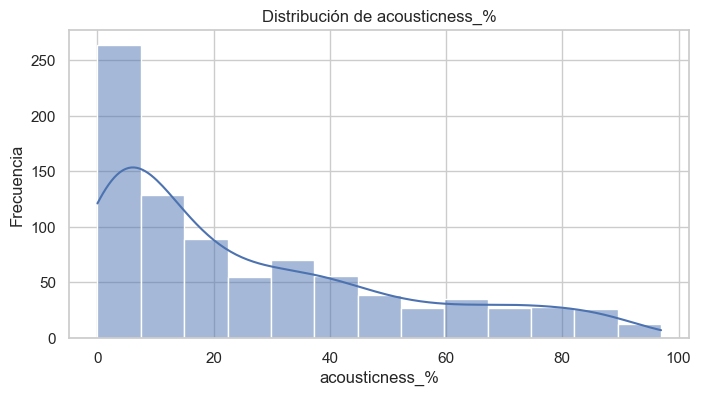

In [141]:
plot_distribution(spotify_data, 'acousticness_%', f'Distribución de acousticness_%')

Se puede observar que la mayor cantidad de canciones del dataset, tienen baja **acústica**, cosa que tiene sentido en la música más nueva y popular.

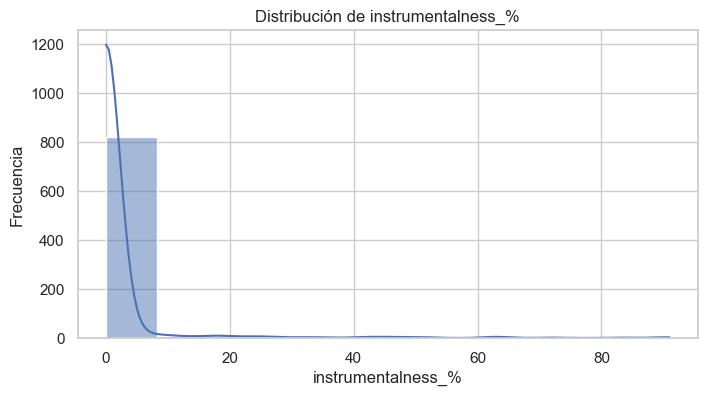

In [142]:
plot_distribution(spotify_data, 'instrumentalness_%', f'Distribución de instrumentalness_%')

Se puede observar que casi la totalidad de los datos tienen una **instrumentalidad baja**, factor clave en la música de estos tiempos donde es más sintética.

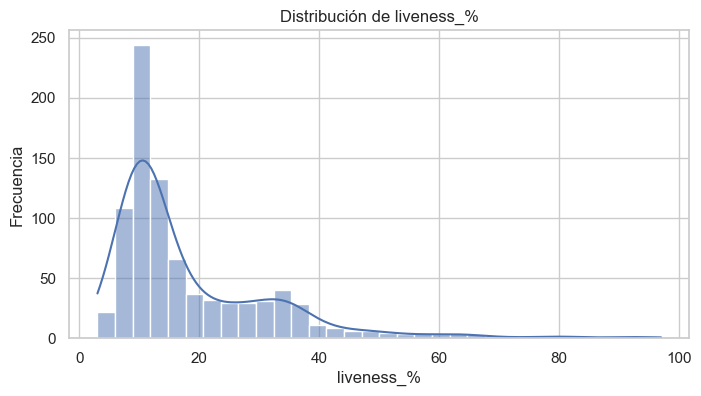

In [143]:
plot_distribution(spotify_data, 'liveness_%', f'Distribución de liveness_%')

Se puede observar que casi la totalidad de los datos tienen una **vivacidad** por debajo del **50%**, teniendo la mayor cantidad de datos con aproximadamente un **10%**.

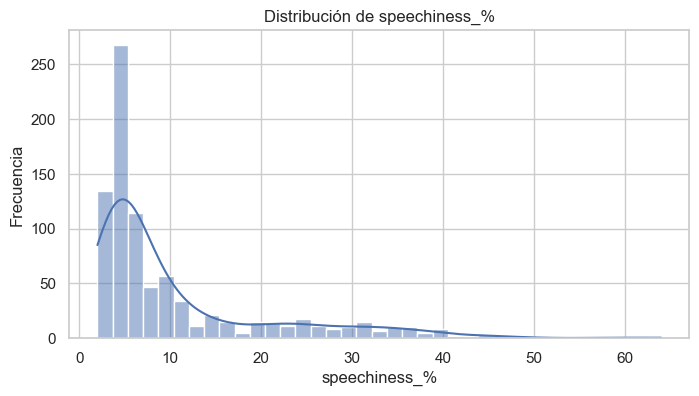

In [144]:
plot_distribution(spotify_data, 'speechiness_%', f'Distribución de speechiness_%')

Se puede observar que la totalidad de las canciones tienen un porcentaje de **habla** bajo el 50%, siendo lo más común un **5%** de habla (palabras habladas).

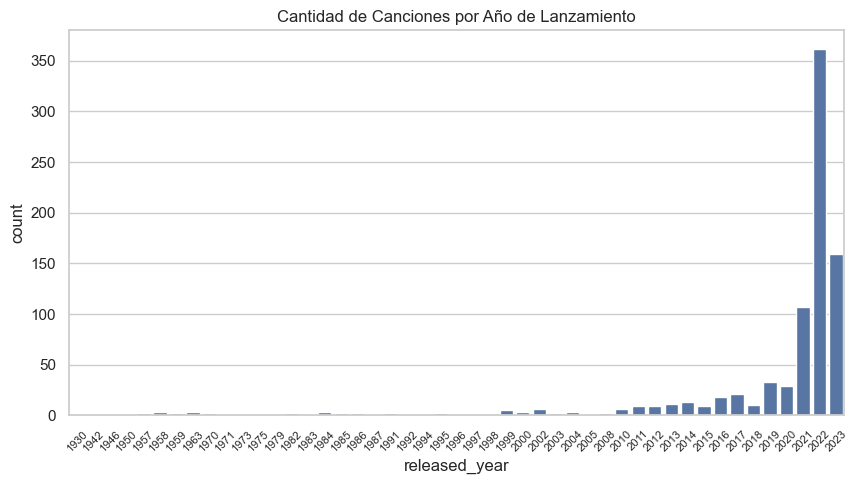

In [145]:
# Gráfico de barras para 'released_year'
plot_bar_chart(spotify_data, 'released_year', 'Cantidad de Canciones por Año de Lanzamiento')

Se puede observar que aproximadamente desde el **2021** al **2023** hay grandes cantidades de datos, pero para atrás no muchos (o no tan significativos), por lo tanto el análisis tendrá más influencia por los datos en este rango de tiempo.

## #4.2 Visualización de relaciones entre las **características musicales y su energía**

Se grafica la dispersión entre variables del conjunto de datos y su energía.

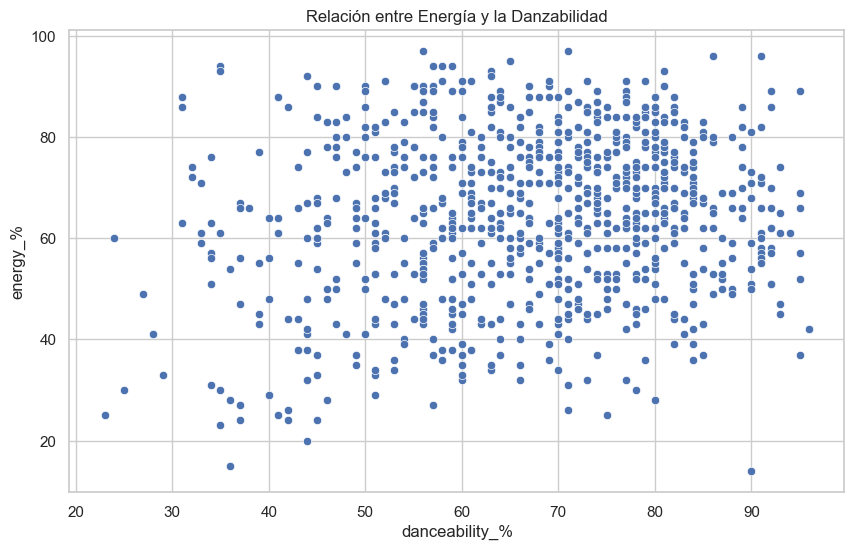

In [146]:
# Gráfico de dispersión para 'danceability_%' y 'energy_%'
plot_scatter(spotify_data, 'danceability_%', 'energy_%', 'Relación entre Energía y la Danzabilidad')

Se puede visualizar aquí una relación proporcional entre el **energía%**, y el **danzabilidad%** que tienen las canciones, factor que tiene sentido en el conjunto de datos.

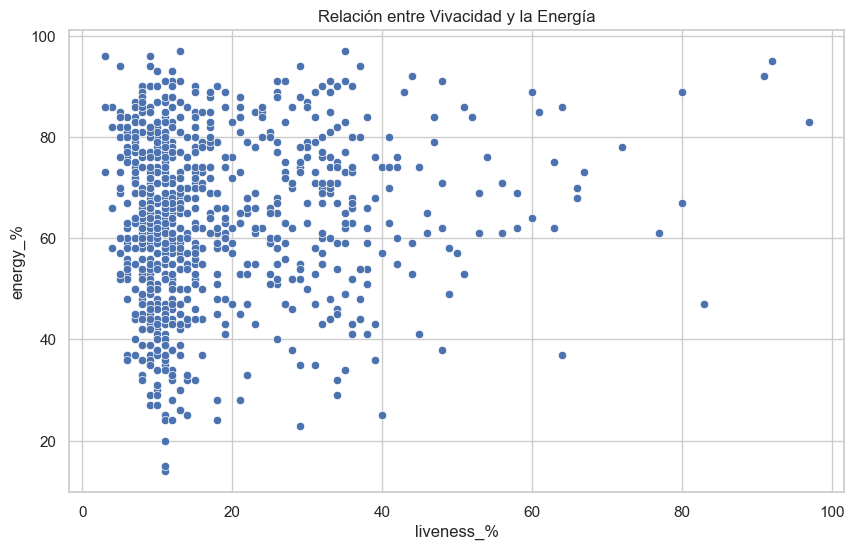

In [147]:
# Gráfico de dispersión para 'liveness_%' y 'energy_%'
plot_scatter(spotify_data, 'liveness_%', 'energy_%', 'Relación entre Vivacidad y la Energía')

Se puede visualizar aquí que a **menor vivacidad**, hay una **mayor cantidad de energía** en las canciones del dataset.

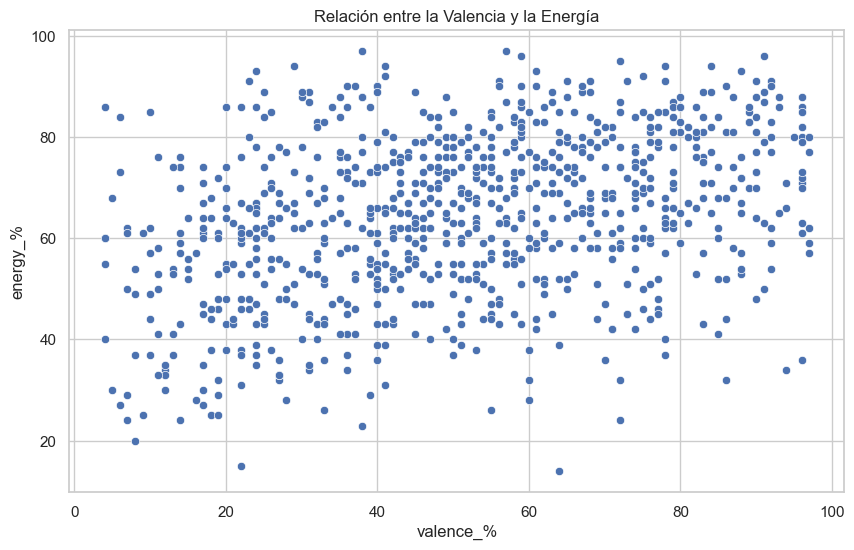

In [148]:
# Gráfico de dispersión para 'valence_%' y 'energy_%'
plot_scatter(spotify_data, 'valence_%', 'energy_%', 'Relación entre la Valencia y la Energía')

Se puede visualizar aquí una relación casi proporcional entre el **energía%**, y el **valencia%** que tienen las canciones, factor que tiene sentido en el conjunto de datos.

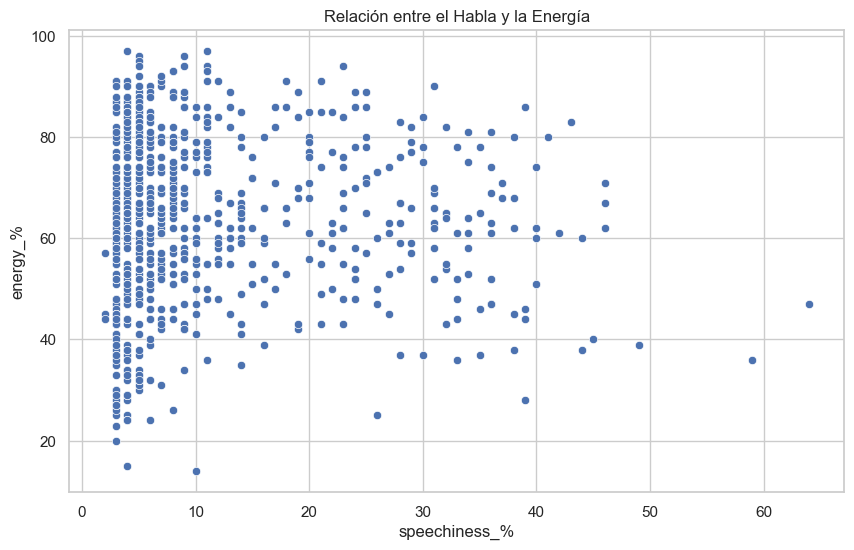

In [149]:
# Gráfico de dispersión para 'speechiness_%' y 'energy_%'
plot_scatter(spotify_data, 'speechiness_%', 'energy_%', 'Relación entre el Habla y la Energía')

Se puede visualizar aquí la relación del **energía%**, y el **habla%** que tienen las canciones, mientras menos habla, más energía tiene la canción, factor que tiene sentido considerando que si no se está cantando, se estará escuchando música que tendrá una alta **energía**.

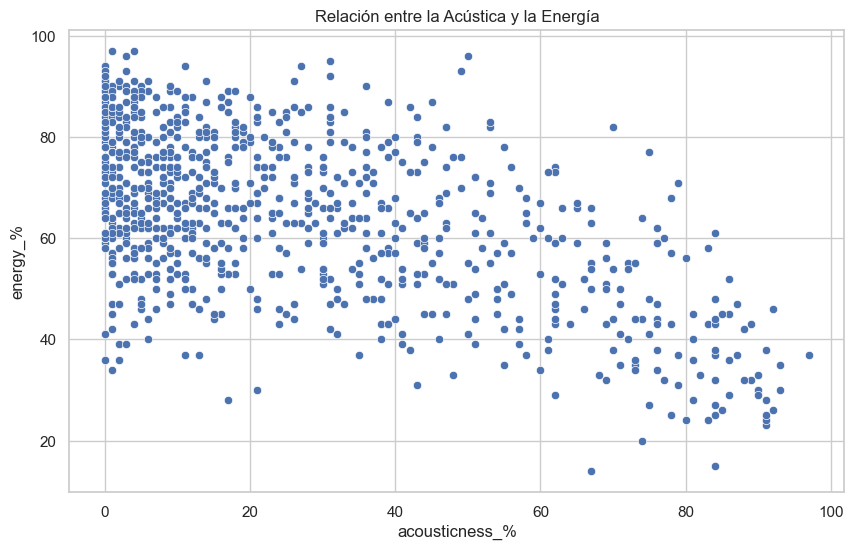

In [150]:
# Gráfico de dispersión para 'acousticness_%' y 'energy_%'
plot_scatter(spotify_data, 'acousticness_%', 'energy_%', 'Relación entre la Acústica y la Energía')

Se puede visualizar aquí la relación del **energía%**, y el **acústica%** que tienen las canciones, mientras **menos acústica**, **más energía** tiene la canción, factor que tiene sentido en la música sintética de hoy en día que tiene una alta **energía**.

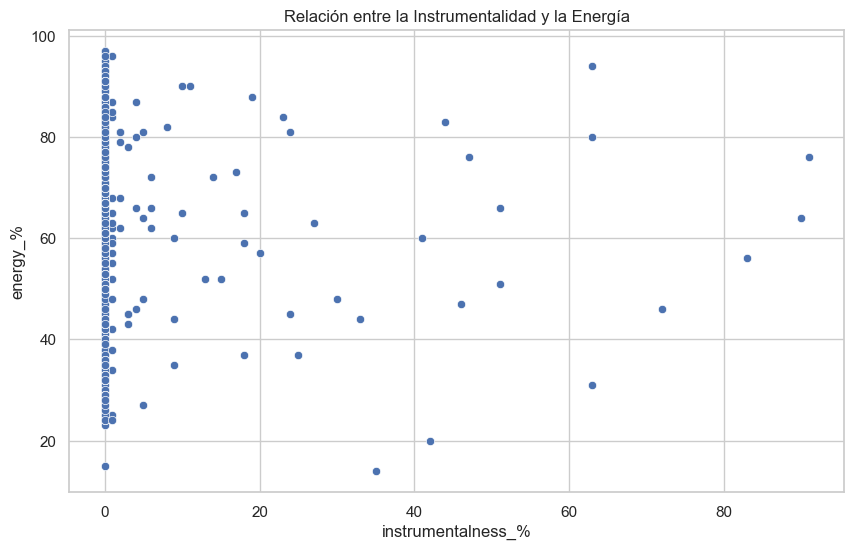

In [151]:
# Gráfico de dispersión para 'instrumentalness_%' y 'energy_%'
plot_scatter(spotify_data, 'instrumentalness_%', 'energy_%', 'Relación entre la Instrumentalidad y la Energía')

Se puede visualizar aquí la relación del **energía%**, y el **instrumentalidad%** que tienen las canciones, mientras **menos instrumentalidad**, **más energía**, factor que tiene sentido en la música sintética de hoy en día que tiene una alta **energía**.

## #4.4 Visualización de relaciones entre **streams** y las características musicales.

Se visualizarán gráficas de dispersión entre la cantidad de streams y las características musicales, en este caso **bpm**, **danzabilidad**, **valencia**, **energía**, **acústica**, **instrumentalidad**, **vivacidad** y **habla**.

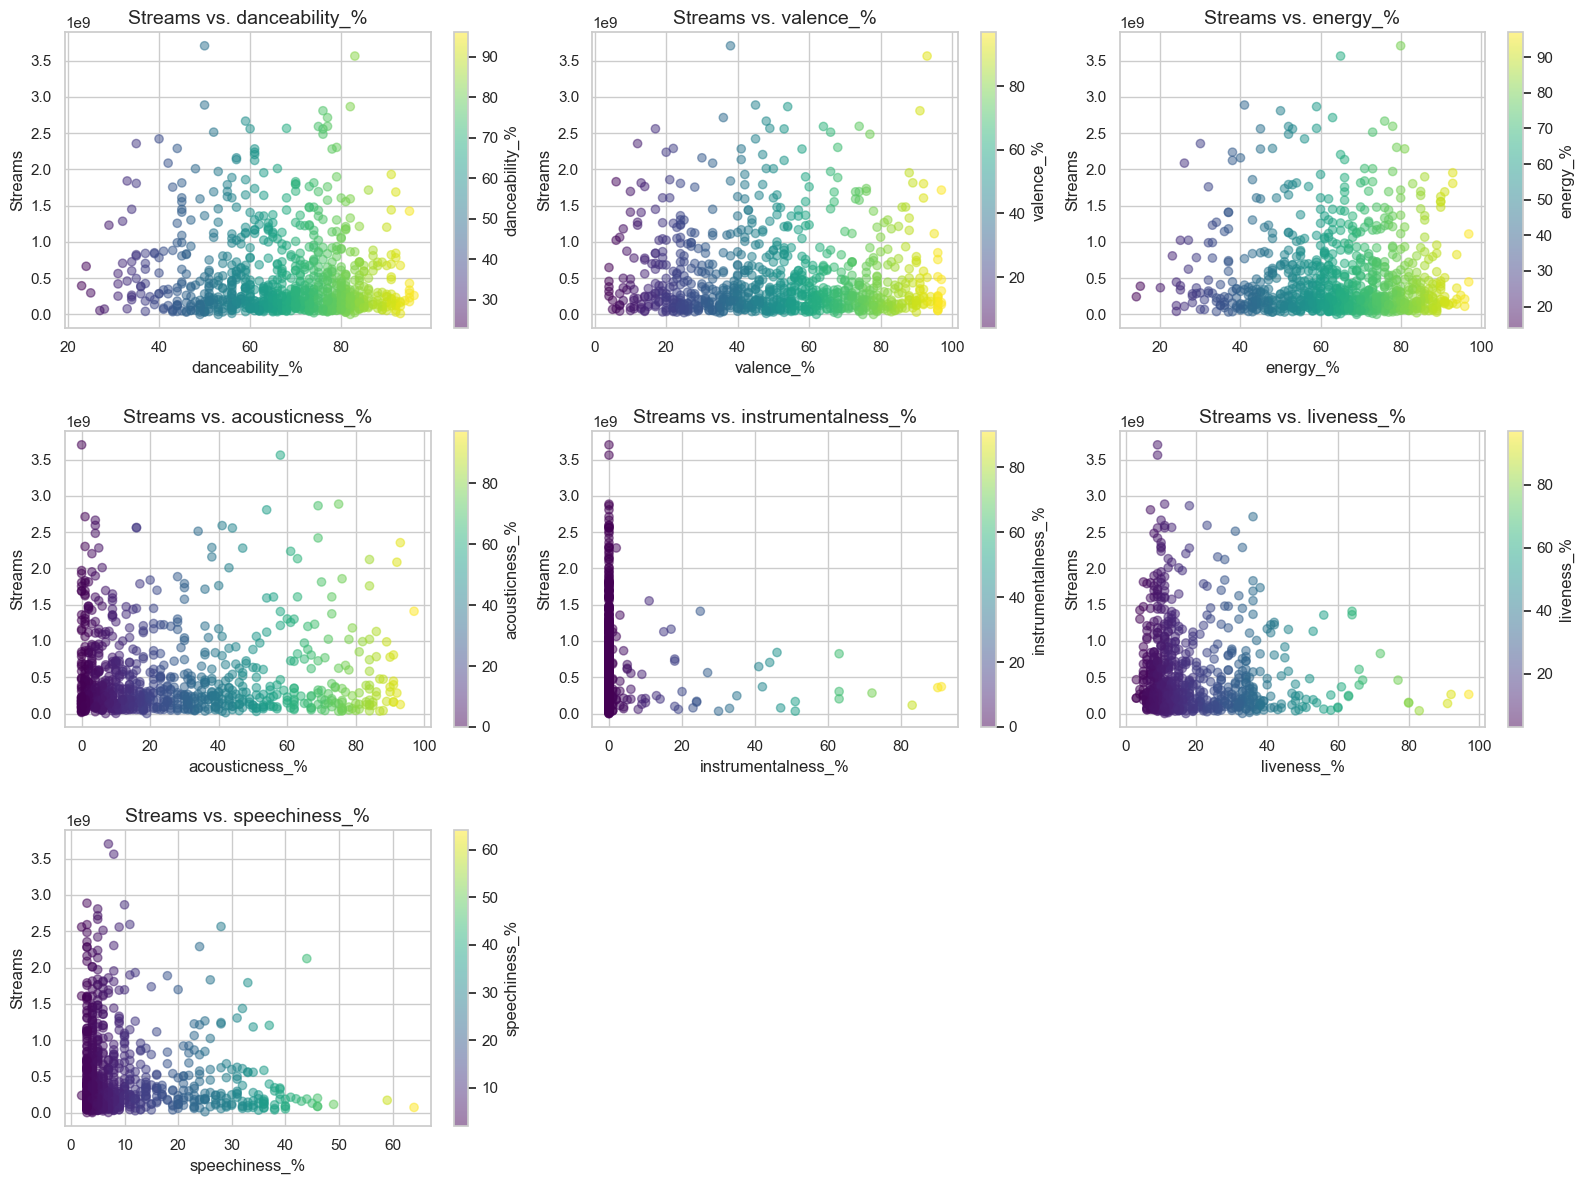

In [152]:
song_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
for i, column in enumerate(song_features):
    plt.sca(axes[i])
    
    scatter = plt.scatter(spotify_data[column], spotify_data['streams'], c=spotify_data[column], cmap='viridis', alpha=0.5)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(song_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se pueden visualizar la dispersión de datos de las **características musicales vs la cantidad de streams**.

## #5 Normalización de datos

Para analizar los datos de forma más coherente en magnitud, se normalizarán las columnas numéricas relevantes identificadas.

In [153]:
# Normalizar todas las columnas relevantes
scaler = MinMaxScaler()
to_normalize_cols = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'artist_count', 'bpm']
spotify_data_normalized = spotify_data.copy()
spotify_data_normalized[to_normalize_cols] = scaler.fit_transform(spotify_data[to_normalize_cols])

## #6.1 Análisis de correlación entre la cantidad de **streams** y la presencia en plataformas digitales

Se visualizará cuál es la correlación que existe entre la cantidad de streams y la presencia en diversas plataformas digitales, en este caso **Spotify**, **Apple**, **Deezer** y **Shazam**.

Correlación de 'streams' con la presencia en plataformas musicales:
 streams                 1.000000
in_spotify_playlists    0.787722
in_apple_playlists      0.774543
in_deezer_playlists     0.382439
in_spotify_charts       0.253142
in_apple_charts         0.314377
in_deezer_charts        0.234305


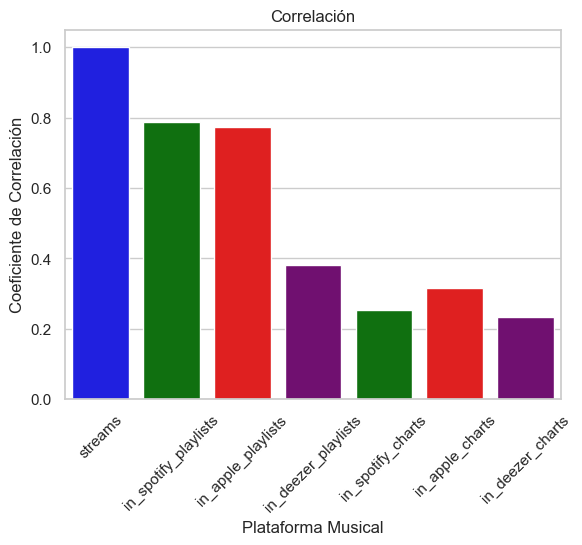

In [154]:
# Calculando la correlación entre 'streams' y la presencia en plataformas musicales
correlation = spotify_data_normalized[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].corr()

# Seleccionar y mostrar solo la fila correspondiente a 'streams'
streams_correlation = correlation.loc['streams']
print("Correlación de 'streams' con la presencia en plataformas musicales:\n", streams_correlation.to_string())

# Colores para cada barra
colores = ['blue', 'green', 'red', 'purple', 'green', 'red', 'purple']

# Opcional: si deseas visualizar esto en un gráfico de barras
sns.barplot(x=streams_correlation.index, y=streams_correlation.values, hue=streams_correlation.index, palette=colores, dodge=False)
plt.title("Correlación")
plt.ylabel("Coeficiente de Correlación")
plt.xlabel("Plataforma Musical")
plt.xticks(rotation=45)
plt.show()

Se puede observar que la presencia de cada canción en las playlist de **Spotify**, **Apple** y **Deezer** (aunque menor) parece tener un gran impacto en la cantidad de streams que alcanza cada canción.

## #6.2 Análisis de correlación entre la cantidad de **streams** y sus características musicales

Se visualizará cuál es la correlación que existe entre la cantidad de streams y las características musicales, en este caso **bpm**, **danzabilidad**, **valencia**, **energía**, **acústica**, **instrumentalidad**, **vivacidad** y **habla**.

                         bpm  danceability_%  valence_%  energy_%  \
bpm                 1.000000       -0.161281   0.026882  0.015911   
danceability_%     -0.161281        1.000000   0.396207  0.165901   
valence_%           0.026882        0.396207   1.000000  0.346939   
energy_%            0.015911        0.165901   0.346939  1.000000   
acousticness_%     -0.012354       -0.239009  -0.066854 -0.561699   
instrumentalness_% -0.005166       -0.098955  -0.144301 -0.050383   
liveness_%         -0.003060       -0.093731   0.010722  0.103557   
speechiness_%       0.046743        0.197493   0.039952 -0.025579   
streams            -0.001684       -0.099579  -0.043797 -0.030003   

                    acousticness_%  instrumentalness_%  liveness_%  \
bpm                      -0.012354           -0.005166   -0.003060   
danceability_%           -0.239009           -0.098955   -0.093731   
valence_%                -0.066854           -0.144301    0.010722   
energy_%                 -0.5

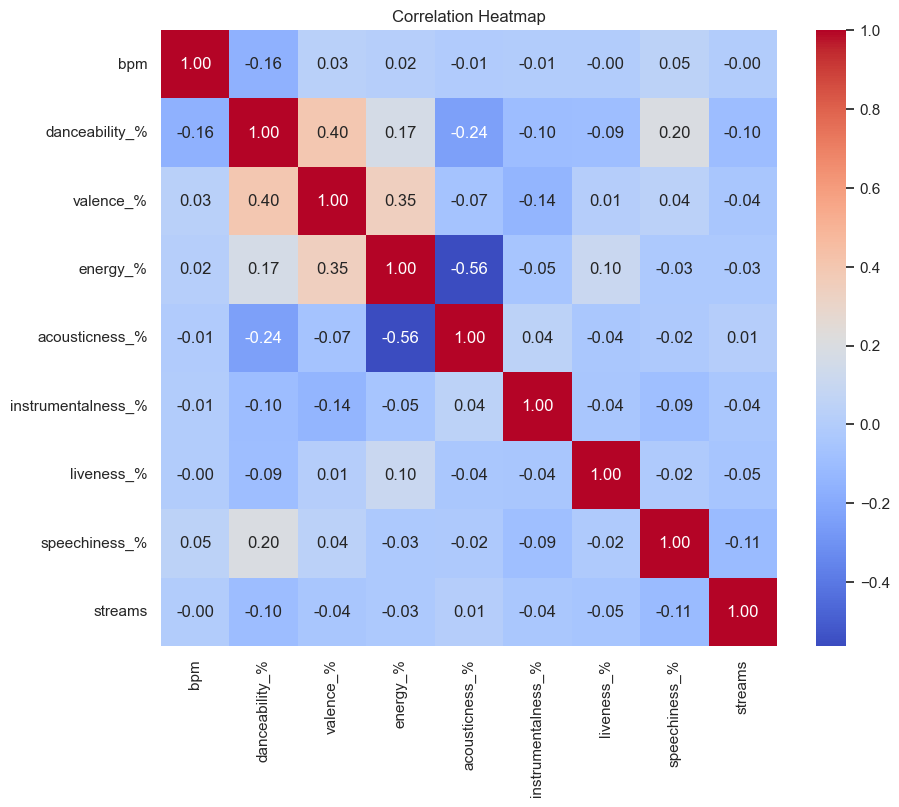

In [155]:
columns_to_correlate = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']

correlation_matrix = spotify_data[columns_to_correlate].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

En este mapa de calor se puede visualizar la correlación que tienen entre sí las características musicales con la cantidad de streams.